<a href="https://colab.research.google.com/github/peeetlasuresh/Ecommerce-Website/blob/main/complete_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.utils import plot_model

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
datadir = "/content/drive/MyDrive/four"
categories = ["Chimpanzee", "cheeta","elephant","girafee2","lion2","rhino2","zebra2"]
# Define constants
img_size = 150
batch_size = 32
epochs = 50

In [ ]:
# Load images and labels
data = []
labels = []
for category in categories:
    path = os.path.join(datadir, category)
    class_num = categories.index(category)
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img))
            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            img_array = cv2.resize(img_array, (img_size, img_size))
            data.append(img_array)
            labels.append(class_num)
        except Exception as e:
            pass


In [ ]:
# Convert to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Normalize data
data = data.astype('float32') / 255.0

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


In [ ]:
# Data augmentation
train_datagen = ImageDataGenerator(rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)

In [ ]:
# Defining model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(len(categories), activation='softmax'))

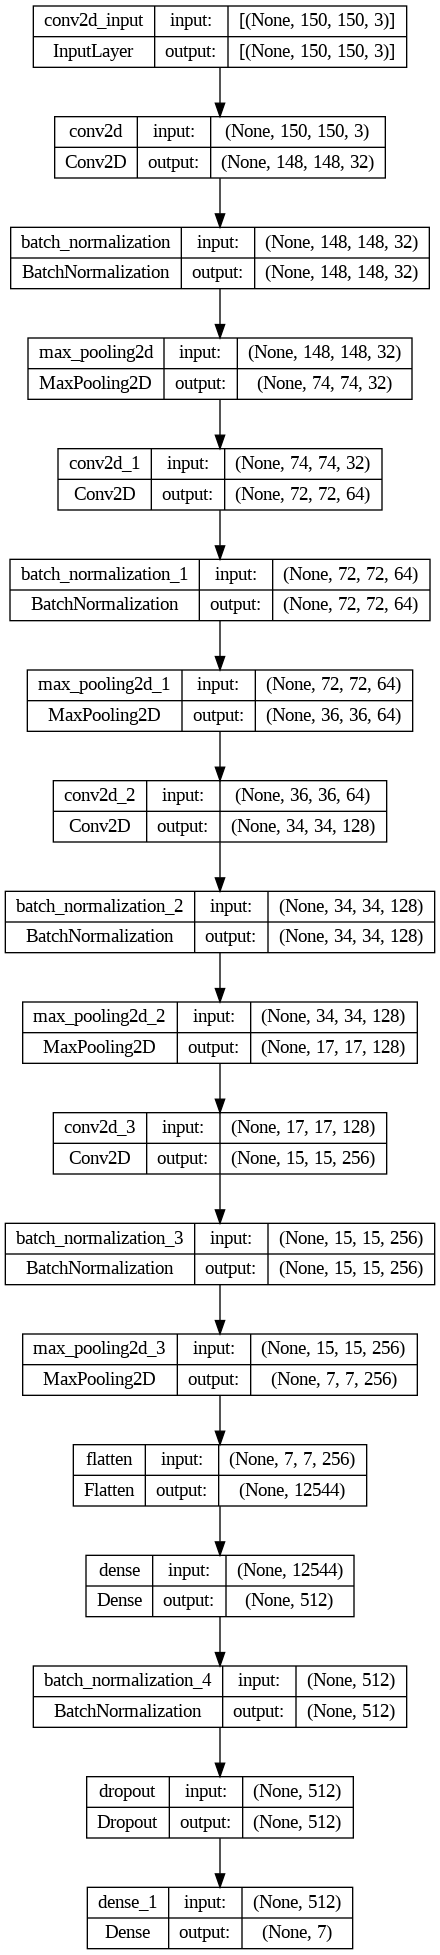

In [ ]:
# Plot model architecture
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

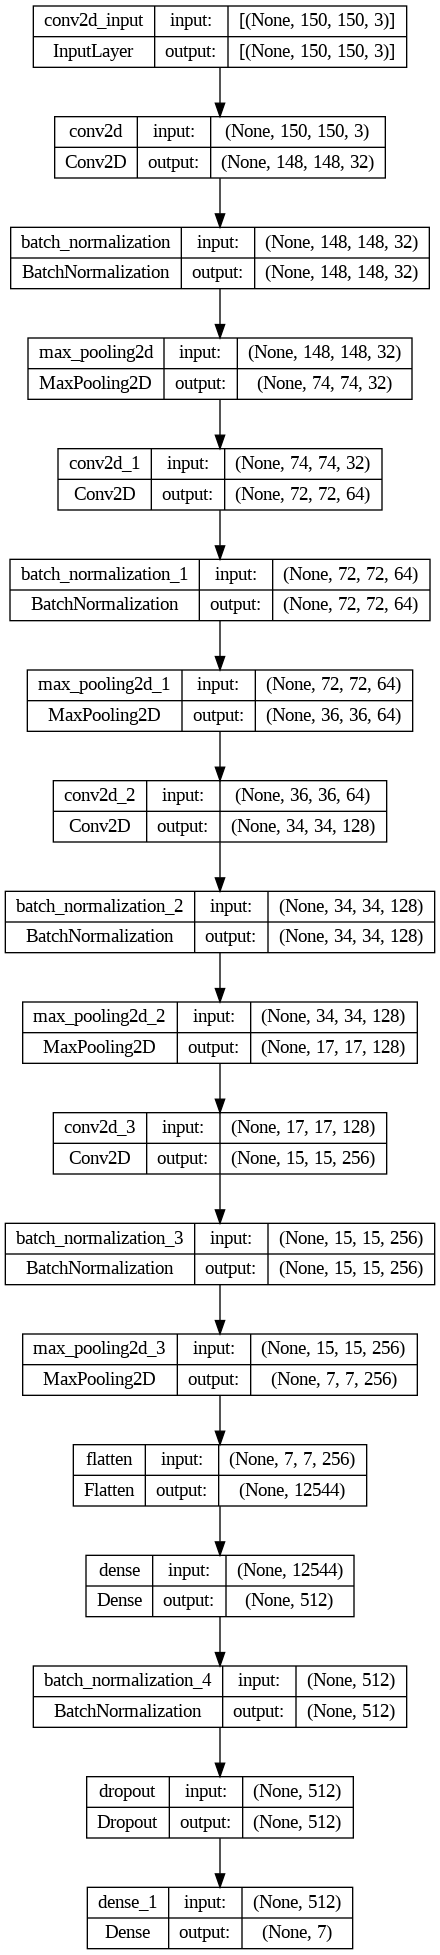

In [ ]:
from IPython.display import Image
Image(filename='model.png')

In [ ]:
# Compile model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train model
history = model.fit(train_generator,
                    steps_per_epoch=len(X_train)//batch_size,
                    epochs=epochs,
                    validation_data=(X_test, y_test))

Epoch 1/50
112/112 [==============================] - 31s 187ms/step - loss: 1.8427 - accuracy: 0.4759 - val_loss: 2.6246 - val_accuracy: 0.2333
Epoch 2/50
112/112 [==============================] - 20s 178ms/step - loss: 1.3367 - accuracy: 0.5783 - val_loss: 2.7178 - val_accuracy: 0.1422
Epoch 3/50
112/112 [==============================] - 19s 170ms/step - loss: 1.1307 - accuracy: 0.6366 - val_loss: 1.8284 - val_accuracy: 0.3678
Epoch 4/50
112/112 [==============================] - 20s 176ms/step - loss: 0.9631 - accuracy: 0.6714 - val_loss: 1.1228 - val_accuracy: 0.5933
Epoch 5/50
112/112 [==============================] - 19s 169ms/step - loss: 0.8880 - accuracy: 0.7034 - val_loss: 0.8108 - val_accuracy: 0.7267
Epoch 6/50
112/112 [==============================] - 21s 184ms/step - loss: 0.7866 - accuracy: 0.7306 - val_loss: 0.9656 - val_accuracy: 0.6522
Epoch 7/50
112/112 [==============================] - 19s 172ms/step - loss: 0.7372 - accuracy: 0.7388 - val_loss: 1.5538 - val_ac

29/29 [==============================] - 0s 13ms/step - loss: 0.9957 - accuracy: 0.7522
Test accuracy: 0.7522222399711609


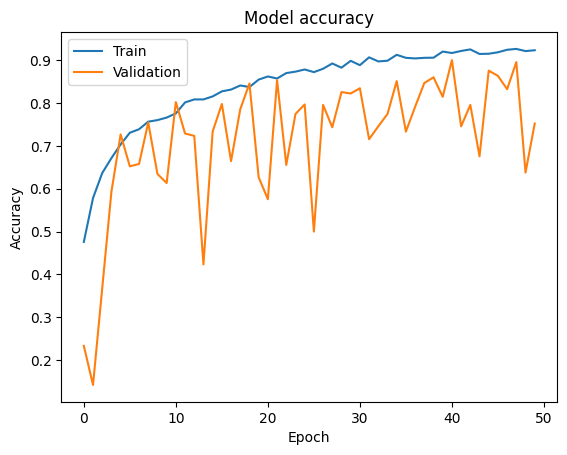

In [ ]:
# Evaluate model on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix

# Get predictions on test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define which class is considered positive
positive_class = 1

# Calculate true positive, true negative, false positive, and false negative
tp = cm[positive_class, positive_class]
tn = np.sum(cm) - np.sum(cm[positive_class, :]) - np.sum(cm[:, positive_class]) + tp
fp = np.sum(cm[:, positive_class]) - tp
fn = np.sum(cm[positive_class, :]) - tp

# Print the values
print(f'True positives: {tp}')
print(f'True negatives: {tn}')
print(f'False positives: {fp}')
print(f'False negatives: {fn}')



29/29 [==============================] - 0s 14ms/step
[[102   1  47   2   0   6  20]
 [  0 139  11   0   0   1  30]
 [  0   0 268   2   0  12   4]
 [  0   0   5  41   0   0  19]
 [  1   0  21   1   0   8  10]
 [  0   0  20   1   0  37   0]
 [  0   0   0   1   0   0  90]]
True positives: 139
True negatives: 718
False positives: 1
False negatives: 42


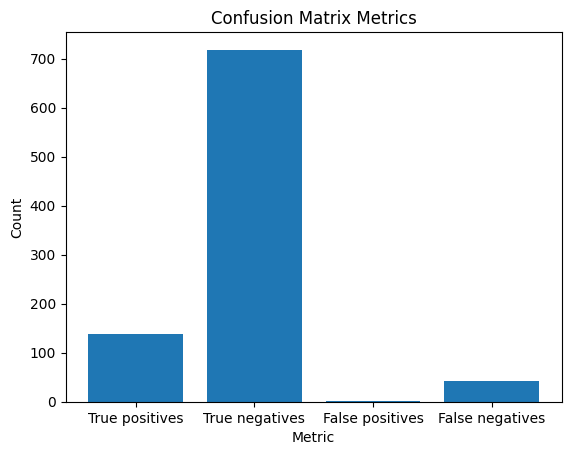

In [ ]:
labels = ['True positives', 'True negatives', 'False positives', 'False negatives']
values = [tp, tn, fp, fn]
plt.bar(labels, values)
plt.title('Confusion Matrix Metrics')
plt.xlabel('Metric')
plt.ylabel('Count')

# Show the plot
plt.show()

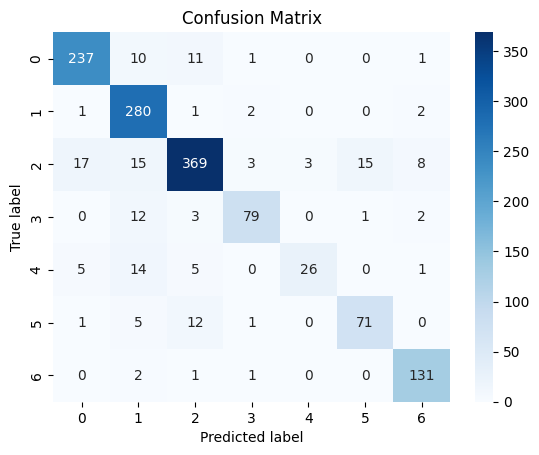

In [ ]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import f1_score

# Get predictions on test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

29/29 [==============================] - 0s 15ms/step
F1 Score: 0.8118499249893737


In [ ]:
from sklearn.metrics import classification_report

# Get predictions on test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Generate classification report
report = classification_report(y_test, y_pred)
print(report)


29/29 [==============================] - 1s 25ms/step
              precision    recall  f1-score   support

           0       0.93      0.80      0.86       178
           1       0.98      0.98      0.98       181
           2       0.91      0.73      0.81       286
           3       0.93      0.63      0.75        65
           4       0.73      0.27      0.39        41
           5       0.36      0.90      0.51        58
           6       0.70      0.98      0.81        91

    accuracy                           0.80       900
   macro avg       0.79      0.76      0.73       900
weighted avg       0.86      0.80      0.81       900



In [ ]:
report_dict = classification_report(y_test, y_pred, output_dict=True)
accuracy = report_dict['accuracy']
precision = report_dict['macro avg']['precision']
recall = report_dict['macro avg']['recall']

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8033333333333333
Precision: 0.7897039093845198
Recall: 0.7555827962107298


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.applications.vgg16 import VGG16
from keras.utils import plot_model

In [ ]:
# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
datadir = "/content/drive/MyDrive/four"
categories = ["Chimpanzee", "cheeta","elephant","girafee2","lion2","rhino2","zebra2"]
# Define constants
img_size = 150
batch_size = 32
epochs = 20

In [ ]:
# Load images and labels
data = []
labels = []
for category in categories:
    path = os.path.join(datadir, category)
    class_num = categories.index(category)
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img))
            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            img_array = cv2.resize(img_array, (img_size, img_size))
            data.append(img_array)
            labels.append(class_num)
        except Exception as e:
            pass
# Convert to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Normalize data
data = data.astype('float32') / 255.0

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)


In [ ]:
# Data augmentation


train_datagen = ImageDataGenerator(rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)
# Load pre-trained VGG16 model
vgg_model = VGG16(input_shape=(img_size, img_size, 3), weights='imagenet', include_top=False)

# Freeze all layers in the pre-trained model
for layer in vgg_model.layers:
    layer.trainable = False

# Create a new model with the pre-trained model as its base
model = Sequential()
model.add(vgg_model)

# Add custom layers on top of the pre-trained model
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(len(categories), activation='softmax'))


58889256/58889256 [==============================] - 0s 0us/step


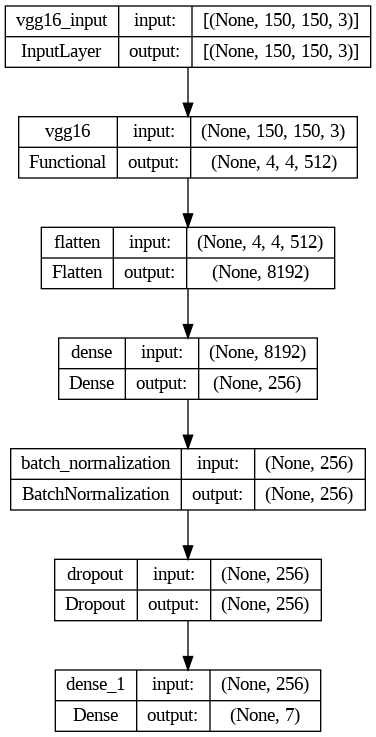

In [ ]:
# Plot model architecture
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

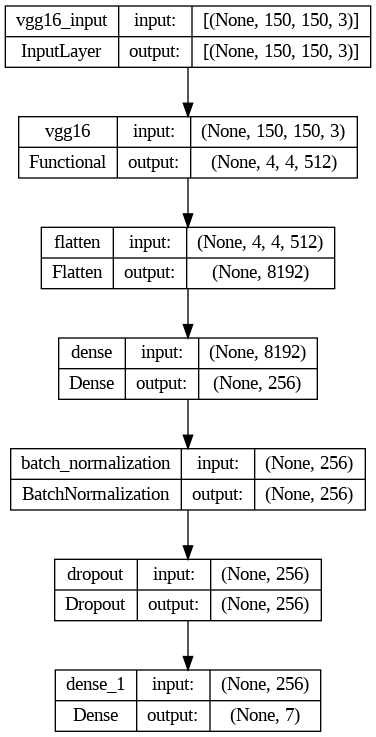

In [ ]:
from IPython.display import Image
Image(filename='model.png')

In [ ]:

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:

# Train model
history = model.fit(train_generator,
                    steps_per_epoch=len(X_train)//batch_size,
                    epochs=30,
                    validation_data=(X_test, y_test))



Epoch 1/30
98/98 [==============================] - 27s 241ms/step - loss: 0.9192 - accuracy: 0.7018 - val_loss: 0.5339 - val_accuracy: 0.8384
Epoch 2/30
98/98 [==============================] - 22s 224ms/step - loss: 0.5979 - accuracy: 0.7926 - val_loss: 0.4252 - val_accuracy: 0.8629
Epoch 3/30
98/98 [==============================] - 22s 227ms/step - loss: 0.5362 - accuracy: 0.8170 - val_loss: 0.3569 - val_accuracy: 0.8792
Epoch 4/30
98/98 [==============================] - 21s 210ms/step - loss: 0.4884 - accuracy: 0.8250 - val_loss: 0.3725 - val_accuracy: 0.8784
Epoch 5/30
98/98 [==============================] - 21s 211ms/step - loss: 0.4498 - accuracy: 0.8421 - val_loss: 0.3268 - val_accuracy: 0.8940
Epoch 6/30
98/98 [==============================] - 22s 225ms/step - loss: 0.4266 - accuracy: 0.8517 - val_loss: 0.4124 - val_accuracy: 0.8517
Epoch 7/30
98/98 [==============================] - 22s 229ms/step - loss: 0.4332 - accuracy: 0.8465 - val_loss: 0.3173 - val_accuracy: 0.8947

43/43 [==============================] - 3s 65ms/step - loss: 0.3291 - accuracy: 0.8844
Test accuracy: 0.8843587636947632


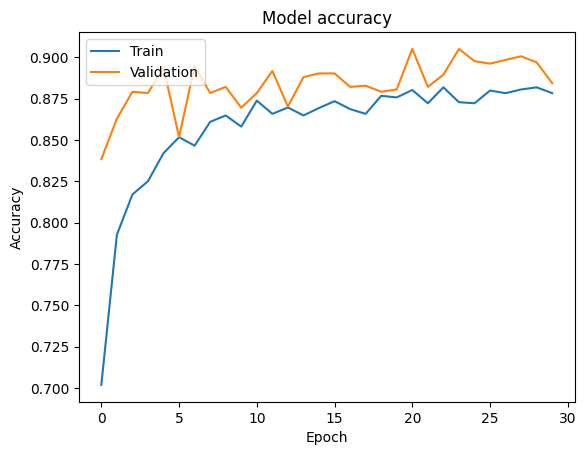

In [ ]:



# Evaluate model on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')



43/43 [==============================] - 3s 64ms/step - loss: 0.3291 - accuracy: 0.8844
Test accuracy: 0.8843587636947632


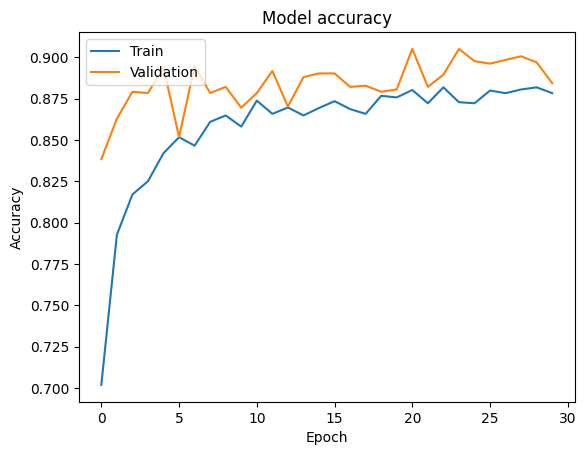

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix

# Get predictions on test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


43/43 [==============================] - 3s 63ms/step
[[237  10  11   1   0   0   1]
 [  1 280   1   2   0   0   2]
 [ 17  15 369   3   3  15   8]
 [  0  12   3  79   0   1   2]
 [  5  14   5   0  26   0   1]
 [  1   5  12   1   0  71   0]
 [  0   2   1   1   0   0 131]]


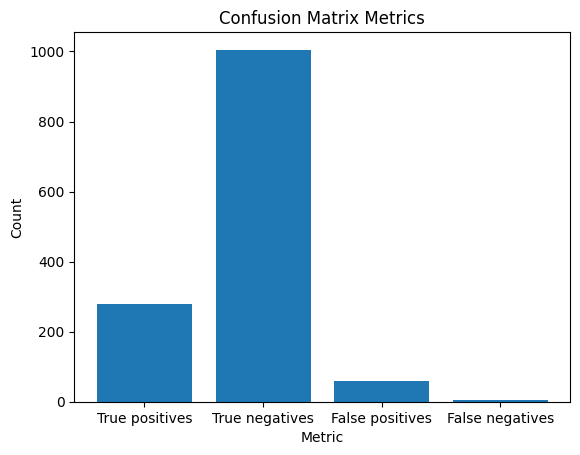

In [ ]:
import matplotlib.pyplot as plt

# Define which class is considered positive
positive_class = 1

# Calculate true positive, true negative, false positive, and false negative
tp = cm[positive_class, positive_class]
tn = np.sum(cm) - np.sum(cm[positive_class, :]) - np.sum(cm[:, positive_class]) + tp
fp = np.sum(cm[:, positive_class]) - tp
fn = np.sum(cm[positive_class, :]) - tp

# Create a bar chart
labels = ['True positives', 'True negatives', 'False positives', 'False negatives']
values = [tp, tn, fp, fn]
plt.bar(labels, values)
plt.title('Confusion Matrix Metrics')
plt.xlabel('Metric')
plt.ylabel('Count')

# Show the plot
plt.show()

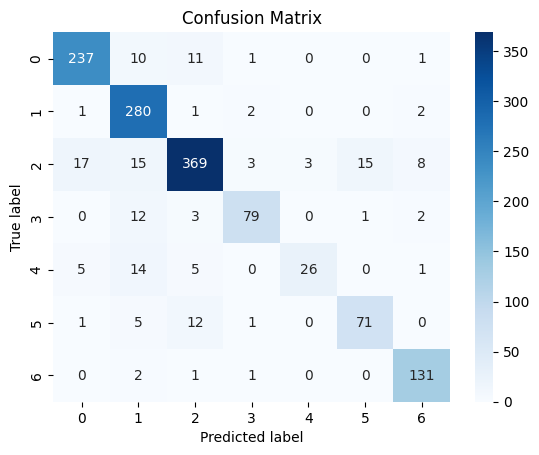

In [ ]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Get predictions on test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Generate classification report
report = classification_report(y_test, y_pred)
print(report)

43/43 [==============================] - 3s 63ms/step
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       260
           1       0.83      0.98      0.90       286
           2       0.92      0.86      0.89       430
           3       0.91      0.81      0.86        97
           4       0.90      0.51      0.65        51
           5       0.82      0.79      0.80        90
           6       0.90      0.97      0.94       135

    accuracy                           0.88      1349
   macro avg       0.88      0.83      0.85      1349
weighted avg       0.89      0.88      0.88      1349



In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam

In [ ]:
# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
datadir = "/content/drive/MyDrive/four"
categories = ["Chimpanzee", "cheeta","elephant","girafee2","lion2","rhino2","zebra2"]
# Define constants
img_size = 150
batch_size = 32
epochs = 50
# Load images and labels
data = []
labels = []
for category in categories:
    path = os.path.join(datadir, category)
    class_num = categories.index(category)
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img))
            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            img_array = cv2.resize(img_array, (img_size, img_size))
            data.append(img_array)
            labels.append(class_num)
        except Exception as e:
            pass
# Convert to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Normalize data

In [ ]:
# Normalize data
data = data.astype('float32') / 255.0

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [ ]:
# Define model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(len(categories), activation='softmax'))

In [ ]:
# Compile model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train model
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_test, y_test))

Epoch 1/50
113/113 [==============================] - 15s 47ms/step - loss: 1.5494 - accuracy: 0.5620 - val_loss: 3.1576 - val_accuracy: 0.2022
Epoch 2/50
113/113 [==============================] - 4s 39ms/step - loss: 0.9329 - accuracy: 0.7013 - val_loss: 3.8287 - val_accuracy: 0.2100
Epoch 3/50
113/113 [==============================] - 4s 36ms/step - loss: 0.7021 - accuracy: 0.7561 - val_loss: 2.0814 - val_accuracy: 0.4411
Epoch 4/50
113/113 [==============================] - 4s 35ms/step - loss: 0.5019 - accuracy: 0.8323 - val_loss: 1.7407 - val_accuracy: 0.5500
Epoch 5/50
113/113 [==============================] - 4s 35ms/step - loss: 0.4292 - accuracy: 0.8512 - val_loss: 1.0941 - val_accuracy: 0.6622
Epoch 6/50
113/113 [==============================] - 5s 40ms/step - loss: 0.3168 - accuracy: 0.8907 - val_loss: 1.1439 - val_accuracy: 0.6500
Epoch 7/50
113/113 [==============================] - 4s 35ms/step - loss: 0.2747 - accuracy: 0.9029 - val_loss: 0.9932 - val_accuracy: 0.668

29/29 [==============================] - 0s 13ms/step - loss: 0.7547 - accuracy: 0.8500
Test accuracy: 0.8500000238418579


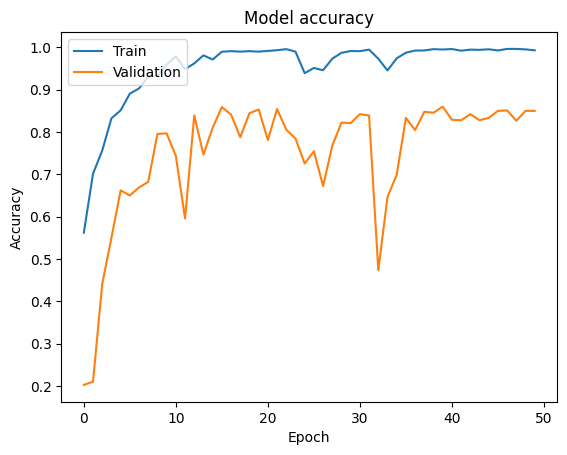

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

# Get predictions on test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define which class is considered positive
positive_class = 1

# Calculate true positive, true negative, false positive, and false negative
tp = cm[positive_class, positive_class]
tn = np.sum(cm) - np.sum(cm[positive_class, :]) - np.sum(cm[:, positive_class]) + tp
fp = np.sum(cm[:, positive_class]) - tp
fn = np.sum(cm[positive_class, :]) - tp

# Print the values
print(f'True positives: {tp}')
print(f'True negatives: {tn}')
print(f'False positives: {fp}')
print(f'False negatives: {fn}')



29/29 [==============================] - 0s 11ms/step
[[163   1  10   2   0   1   1]
 [  3 175   1   2   0   0   0]
 [ 14   5 248   6   4   4   5]
 [  5   5   2  48   0   0   5]
 [  4  11  10   2  13   0   1]
 [  1   3  18   1   0  35   0]
 [  2   2   4   0   0   0  83]]
True positives: 175
True negatives: 692
False positives: 27
False negatives: 6


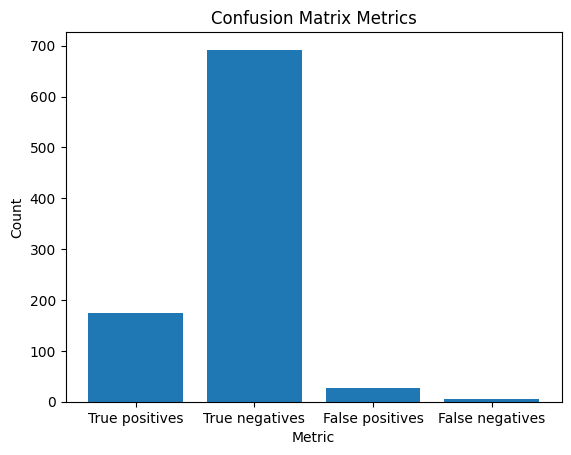

In [ ]:
labels = ['True positives', 'True negatives', 'False positives', 'False negatives']
values = [tp, tn, fp, fn]
plt.bar(labels, values)
plt.title('Confusion Matrix Metrics')
plt.xlabel('Metric')
plt.ylabel('Count')

# Show the plot
plt.show()

In [ ]:
from sklearn.metrics import f1_score

# Get predictions on test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

29/29 [==============================] - 0s 11ms/step
F1 Score: 0.8419840048307801


In [ ]:
from sklearn.metrics import classification_report

# Get predictions on test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Generate classification report
report = classification_report(y_test, y_pred)
print(report)


29/29 [==============================] - 0s 11ms/step
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       178
           1       0.87      0.97      0.91       181
           2       0.85      0.87      0.86       286
           3       0.79      0.74      0.76        65
           4       0.76      0.32      0.45        41
           5       0.88      0.60      0.71        58
           6       0.87      0.91      0.89        91

    accuracy                           0.85       900
   macro avg       0.84      0.76      0.78       900
weighted avg       0.85      0.85      0.84       900



In [ ]:
report_dict = classification_report(y_test, y_pred, output_dict=True)
accuracy = report_dict['accuracy']
precision = report_dict['macro avg']['precision']
recall = report_dict['macro avg']['recall']

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.85
Precision: 0.8374266697185936
Recall: 0.7601121328691468


In [ ]:
#VGG16

In [ ]:
from keras.applications.vgg16 import VGG16

# Load pre-trained VGG16 model
vgg_model = VGG16(input_shape=(img_size, img_size, 3), weights='imagenet', include_top=False)

# Freeze all layers in the pre-trained model
for layer in vgg_model.layers:
    layer.trainable = False

# Create a new model with the pre-trained model as its base
model = Sequential()
model.add(vgg_model)

# Add custom layers on top of the pre-trained model
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(len(categories), activation='softmax'))

58889256/58889256 [==============================] - 3s 0us/step


In [ ]:

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

NameError: ignored

In [ ]:
# Train model
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_test, y_test))

Epoch 1/50
113/113 [==============================] - 16s 105ms/step - loss: 0.6251 - accuracy: 0.7925 - val_loss: 0.5626 - val_accuracy: 0.8189
Epoch 2/50
113/113 [==============================] - 10s 85ms/step - loss: 0.2664 - accuracy: 0.9124 - val_loss: 0.3477 - val_accuracy: 0.8722
Epoch 3/50
113/113 [==============================] - 10s 85ms/step - loss: 0.1759 - accuracy: 0.9433 - val_loss: 0.3572 - val_accuracy: 0.8778
Epoch 4/50
113/113 [==============================] - 10s 92ms/step - loss: 0.1229 - accuracy: 0.9616 - val_loss: 0.3441 - val_accuracy: 0.8844
Epoch 5/50
113/113 [==============================] - 10s 85ms/step - loss: 0.0911 - accuracy: 0.9766 - val_loss: 0.2934 - val_accuracy: 0.9011
Epoch 6/50
113/113 [==============================] - 9s 84ms/step - loss: 0.0825 - accuracy: 0.9758 - val_loss: 0.3060 - val_accuracy: 0.8922
Epoch 7/50
113/113 [==============================] - 10s 84ms/step - loss: 0.0753 - accuracy: 0.9805 - val_loss: 0.2882 - val_accuracy:

29/29 [==============================] - 2s 65ms/step - loss: 0.3229 - accuracy: 0.9178
Test accuracy: 0.9177777767181396


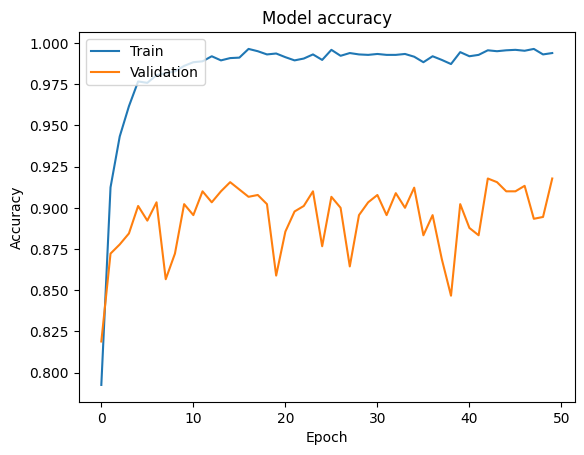

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

# Get predictions on test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define which class is considered positive
positive_class = 1

# Calculate true positive, true negative, false positive, and false negative
tp = cm[positive_class, positive_class]
tn = np.sum(cm) - np.sum(cm[positive_class, :]) - np.sum(cm[:, positive_class]) + tp
fp = np.sum(cm[:, positive_class]) - tp
fn = np.sum(cm[positive_class, :]) - tp

# Print the values
print(f'True positives: {tp}')
print(f'True negatives: {tn}')
print(f'False positives: {fp}')
print(f'False negatives: {fn}')



29/29 [==============================] - 2s 64ms/step
[[167   1   8   0   1   0   1]
 [  1 178   0   2   0   0   0]
 [  3   3 260   1   6  11   2]
 [  0   3   2  58   0   1   1]
 [  6   2   4   0  28   1   0]
 [  0   1   8   1   0  48   0]
 [  0   1   1   2   0   0  87]]
True positives: 178
True negatives: 708
False positives: 11
False negatives: 3


In [ ]:
from sklearn.metrics import f1_score

# Get predictions on test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

29/29 [==============================] - 2s 65ms/step
F1 Score: 0.917158505091538


In [ ]:
from sklearn.metrics import classification_report

# Get predictions on test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Generate classification report
report = classification_report(y_test, y_pred)
print(report)


29/29 [==============================] - 2s 63ms/step
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       178
           1       0.94      0.98      0.96       181
           2       0.92      0.91      0.91       286
           3       0.91      0.89      0.90        65
           4       0.80      0.68      0.74        41
           5       0.79      0.83      0.81        58
           6       0.96      0.96      0.96        91

    accuracy                           0.92       900
   macro avg       0.89      0.88      0.89       900
weighted avg       0.92      0.92      0.92       900



In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import ResNet50
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
# Data augmentation
train_datagen = ImageDataGenerator(rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)

# Define ResNet-50 base model
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(img_size, img_size, 3))


94765736/94765736 [==============================] - 5s 0us/step


In [ ]:
pip install --upgrade keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install keras-applications

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 6.4 MB/s eta 0:00:00


In [ ]:
# Build model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(len(categories), activation='softmax'))

In [ ]:
# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Compile model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train model
history = model.fit(train_generator,
                    steps_per_epoch=len(X_train)//batch_size,
                    epochs=epochs,
                    validation_data=(X_test, y_test))

Epoch 1/50
112/112 [==============================] - 29s 226ms/step - loss: 1.6984 - accuracy: 0.4341 - val_loss: 5.6715 - val_accuracy: 0.3256
Epoch 2/50
112/112 [==============================] - 23s 205ms/step - loss: 1.3664 - accuracy: 0.5370 - val_loss: 2.4835 - val_accuracy: 0.4100
Epoch 3/50
112/112 [==============================] - 23s 200ms/step - loss: 1.2975 - accuracy: 0.5547 - val_loss: 2.0085 - val_accuracy: 0.4433
Epoch 4/50
112/112 [==============================] - 24s 213ms/step - loss: 1.2398 - accuracy: 0.5600 - val_loss: 1.5011 - val_accuracy: 0.5556
Epoch 5/50
112/112 [==============================] - 21s 187ms/step - loss: 1.1761 - accuracy: 0.5892 - val_loss: 7.4558 - val_accuracy: 0.1711
Epoch 6/50
112/112 [==============================] - 24s 210ms/step - loss: 1.1513 - accuracy: 0.5965 - val_loss: 1.7332 - val_accuracy: 0.5711
Epoch 7/50
112/112 [==============================] - 22s 197ms/step - loss: 1.1267 - accuracy: 0.6089 - val_loss: 1.9699 - val_ac

In [ ]:
from sklearn.metrics import confusion_matrix

# Get predictions on test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define which class is considered positive
positive_class = 1

# Calculate true positive, true negative, false positive, and false negative
tp = cm[positive_class, positive_class]
tn = np.sum(cm) - np.sum(cm[positive_class, :]) - np.sum(cm[:, positive_class]) + tp
fp = np.sum(cm[:, positive_class]) - tp
fn = np.sum(cm[positive_class, :]) - tp

# Print the values
print(f'True positives: {tp}')
print(f'True negatives: {tn}')
print(f'False positives: {fp}')
print(f'False negatives: {fn}')



29/29 [==============================] - 3s 52ms/step
[[171   0   7   0   0   0   0]
 [139   4  14   7   0   1  16]
 [110   0 172   0   0   3   1]
 [ 43   0   8   9   0   0   5]
 [ 38   0   2   0   1   0   0]
 [ 28   0  15   0   0  15   0]
 [ 25   0   7   2   0   1  56]]
True positives: 4
True negatives: 719
False positives: 0
False negatives: 177


In [ ]:
from sklearn.metrics import f1_score

# Get predictions on test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

29/29 [==============================] - 1s 51ms/step
F1 Score: 0.42465266910152316


In [ ]:
from sklearn.metrics import classification_report

# Get predictions on test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Generate classification report
report = classification_report(y_test, y_pred)
print(report)


29/29 [==============================] - 1s 51ms/step
              precision    recall  f1-score   support

           0       0.31      0.96      0.47       178
           1       1.00      0.02      0.04       181
           2       0.76      0.60      0.67       286
           3       0.50      0.14      0.22        65
           4       1.00      0.02      0.05        41
           5       0.75      0.26      0.38        58
           6       0.72      0.62      0.66        91

    accuracy                           0.48       900
   macro avg       0.72      0.37      0.36       900
weighted avg       0.71      0.48      0.42       900



Epoch 1/50
112/112 [==============================] - 40s 317ms/step - loss: 0.4349 - accuracy: 0.8662 - val_loss: 0.1537 - val_accuracy: 0.9589
Epoch 2/50
112/112 [==============================] - 21s 187ms/step - loss: 0.2854 - accuracy: 0.9082 - val_loss: 0.1234 - val_accuracy: 0.9544
Epoch 3/50
112/112 [==============================] - 20s 175ms/step - loss: 0.2529 - accuracy: 0.9127 - val_loss: 0.0971 - val_accuracy: 0.9689
Epoch 4/50
112/112 [==============================] - 20s 179ms/step - loss: 0.2087 - accuracy: 0.9310 - val_loss: 0.1238 - val_accuracy: 0.9600
Epoch 5/50
112/112 [==============================] - 20s 179ms/step - loss: 0.2143 - accuracy: 0.9279 - val_loss: 0.1117 - val_accuracy: 0.9622
Epoch 6/50
112/112 [==============================] - 21s 186ms/step - loss: 0.1995 - accuracy: 0.9313 - val_loss: 0.1025 - val_accuracy: 0.9644
Epoch 7/50
112/112 [==============================] - 20s 177ms/step - loss: 0.1913 - accuracy: 0.9391 - val_loss: 0.1286 - val_ac

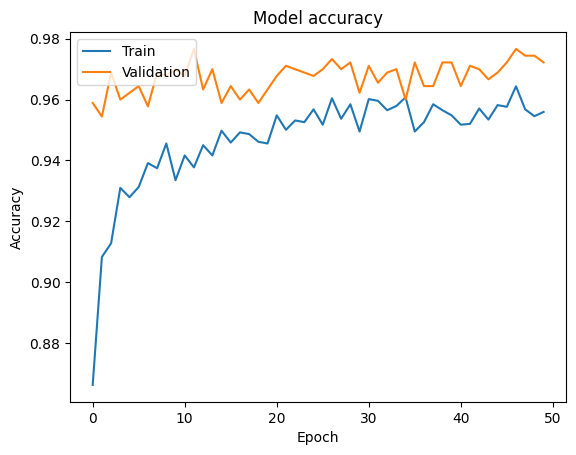

In [ ]:
from keras.applications.inception_v3 import InceptionV3

# Define InceptionV3 base model
base_model = InceptionV3(include_top=False, weights='imagenet', input_shape=(img_size, img_size, 3))

# Build model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(len(categories), activation='softmax'))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(train_generator,
                    steps_per_epoch=len(X_train)//batch_size,
                    epochs=epochs,
                    validation_data=(X_test, y_test))

# Evaluate model on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()